In [10]:
from numpy import arange
import matplotlib.pyplot as plt
from vpython import *

### Parameters for all objects

In [2]:
#Mass (kg)
rocket_mass = 550*10**3                  #Mass of Falcon-9
jupiter_mass = 1.8982*10**27

#Radii (m)
rocket_radius = 10*10**2                 #Arbitrary radius for visibilty
jupiter_radius = 71.492*10**6

#Standard gravitational parameter (m^3/s^2)
j_grav_param = 1.267*10**17

#### Other Constants

In [3]:
#Average distance of Jupiter from sun (m)
jupiter_sun_dist = 778*10**9            
dist_factor = 1000

#Reduces jupiter-sun distance by dist_factor
jupiter_sun_dist = jupiter_sun_dist/dist_factor

### Functions

In [4]:
#Calculates acceleration vector for rocket depending on sphere of influence (soi)
def r_accel(i, jupiter_pull_on_rocket):
    #Jupiter pull on rocket
    r_force = jupiter_pull_on_rocket*norm(jupiter.pos-r_pos_array[i])
    return r_force / rocket_mass


#Sets text of rocket label during simulation
def r_label_txt (i, jupiter_pull_on_rocket, flag):
    #Calculations of variables
    o_vel = mag(r_vel_array[i])
    j_pull = int(jupiter_pull_on_rocket*10**-3)
    
    text = (
            f"Falcon-9"
            f"\nVelocity: {o_vel/1000:.2f}km/s"   
            f"\nPull from Jupiter: {j_pull}kN"
        )
    if flag==True:
        alert = "\n*PLEASE INSERT (2) COINS TO CONTINUE*\n"
        text = alert + text + alert
    return text

### Initialization of Objects

In [5]:
#Initial positions
r_init_pos = vector(-0.3*jupiter_sun_dist,-0.3*jupiter_sun_dist,0)
j_init_pos = vector(jupiter_sun_dist, -jupiter_sun_dist/10, 0)

#Setting initial positions into arrays for tracking
r_pos_array = [r_init_pos]     
j_pos_array = [j_init_pos]

#Initial Velocity (m/s)
r_init_vel = 40*10**3

#Average orbital velocity for jupiter (m/s)
j_vel = 13.06*10**3

#Adds velocity vectors to array
r_vel_array = [vector(r_init_vel, r_init_vel/3, 0) ]  
j_vel_array = [vector(0, j_vel, 0)]

In [6]:
#VPython objects must happen after initialization of position arrays

jupiter = sphere(pos = j_init_pos, 
                 radius = jupiter_radius, 
                 color = color.orange)

rocket = sphere(pos = r_init_pos, 
                radius = rocket_radius, 
                color = color.yellow, 
                make_trail = True, 
                retain = 50)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Simulation Loops

#### Constants for loops

In [7]:
#Initialization for r_label_text argument
flag = False

#Increase speed of animation by (time_step)x
time_step = 1
calc_rate = 1000

#Sets how many times loop will iterate
really_long_time = 60*10**3 

In [8]:
canvas(width=600, height=180)

#Initialized in this cell so canvas output stays here
rocket_label = (
    label(canvas=scene,
          pixel_pos=True, pos=vec(70,75,0), 
          align="center", text="Loading...", height=10, opacity=1)
)


###Calculation and Animation Loop
for time in range(1, really_long_time):
    rate(2*calc_rate) 
    

###Calculations of current position and velocity vectors
    
    #Force of jupiter on rocket
    j_r_f = j_grav_param * rocket_mass / mag2(jupiter.pos - r_pos_array[time-1])
    
    #Calculates intermediary velocity vector
    r_vel_step = r_vel_array[time-1] + r_accel(time-1, j_r_f)*(time_step/2)
    
    #Adds next element to position array for both objects
    r_pos_array.append(r_pos_array[time-1] + r_vel_step*time_step)
    j_pos_array.append(j_pos_array[time-1] + j_vel_array[time-1]*time_step)
    
    #Updates rocket label 
    rocket_label.text = r_label_txt(time-1, j_r_f, flag)   
    
    
###Calculation of future elements (time+1)

    #Force of jupiter on rocket
    j_r_f = j_grav_param * rocket_mass / mag2(jupiter.pos - r_pos_array[time])
    
    #Adds next elements to vector arrays
    r_vel_array.append(r_vel_step + r_accel(time, j_r_f)*(time_step/2))
    j_vel_array.append(j_vel_array[time-1])
    
    #Updates object positions
    rocket.pos = r_pos_array[time]
    jupiter.pos = j_pos_array[time]
    
    #Updates rocket label 
    rocket_label.text = r_label_txt(time, j_r_f, flag) 
    
    
#Changes rocket label once out of loop
flag = True
rocket_label.pos = vec(115,100,0)
rocket_label.text = r_label_txt(time, j_r_f, flag)

<IPython.core.display.Javascript object>

### Plot of Rocket's velocity

The velocity plot is calculated from Sun's reference frame, as Jupiter is moving. From Jupiter's reference frame, it wouldn't be moving and velocity would have gone back to the same value before being in Jupiter's sphere of influence.

In [11]:
#Creates x-axis from number of rocket positions calculated
x = arange(len(r_pos_array))

#Vectors in r_vel_array are converted to magnitude
r_vel_array = list(map(lambda x: mag(x), r_vel_array))

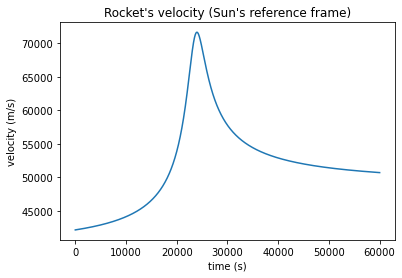

In [12]:
plt.plot(x, r_vel_array)
plt.title("Rocket's velocity (Sun's reference frame)")
plt.xlabel("time (s)")
plt.ylabel("velocity (m/s)")
plt.show()